Credit Card Fraud Detection

## Business Problem

Financial fraud results in significant losses for financial institutions.
The objective of this project is to develop a machine learning model 
that detects fraudulent transactions in a highly imbalanced dataset 
while minimizing false positives.

## Dataset Overview

The dataset contains anonymized credit card transactions. 
The target variable `Class` indicates:
- 0 → Legitimate transaction
- 1 → Fraudulent transaction

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 21.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [seaborn]2/14 [matplotlib]n]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.getcwd()

'/Users/efaeka/Library/CloudStorage/OneDrive-Personal/fraud detection'

In [4]:
os.listdir()

['eda.ipynb', 'creditcard.csv', '.ipynb_checkpoints', 'archive.zip']

In [5]:
import os
os.getcwd()

'/Users/efaeka/Library/CloudStorage/OneDrive-Personal/fraud detection'

# LOAD DATASET

In [5]:
df = pd.read_csv("creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Basic Inspection

In [9]:
df.shape
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Class Distribution

In [13]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

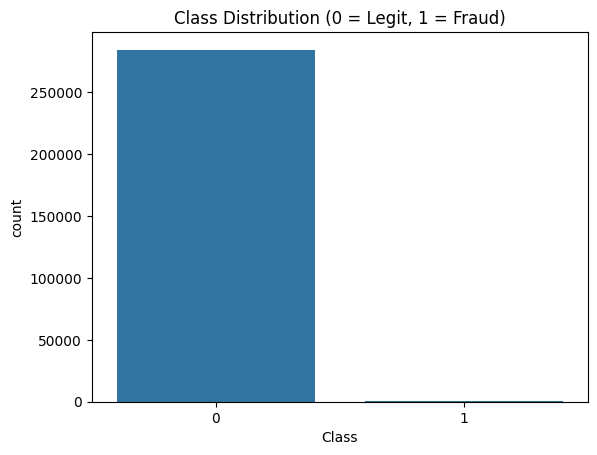

In [14]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

The dataset is highly imbalanced, with fraudulent transactions representing only a small fraction of total transactions.

# Fraud Percentage Calculation

In [15]:
fraud_percentage = (df['Class'].value_counts()[1] / len(df)) * 100
print(f"Fraudulent transactions: {fraud_percentage:.4f}%")

Fraudulent transactions: 0.1727%


## Class Imbalance Analysis

The dataset is highly imbalanced, with fraudulent transactions 
representing approximately 0.17% of total transactions.

This imbalance makes accuracy an unreliable evaluation metric.
Instead, precision, recall, F1-score, and ROC-AUC will be used 
to properly evaluate model performance.

## Data Preparation

In [7]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split (classify for imbalanced data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (227845, 30)
Test shape: (56962, 30)


# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluation Metrics

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))

Accuracy: 0.9991397773954567

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:

[[56851    13]
 [   36    62]]

ROC-AUC Score: 0.9605494455801453


## Baseline Model Evaluation

Although the model achieves high accuracy, this is misleading due to 
the severe class imbalance in the dataset.

Since fraudulent transactions represent a very small percentage of total 
transactions, a model can achieve high accuracy by simply predicting 
most transactions as legitimate.

Therefore, precision, recall, F1-score, and ROC-AUC are more appropriate 
metrics for evaluating fraud detection systems.

## Logistic Regression with Class Weights

In [12]:
from sklearn.linear_model import LogisticRegression

weighted_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

weighted_model.fit(X_train_scaled, y_train)

y_pred_weighted = weighted_model.predict(X_test_scaled)

# Evaluate

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_weighted))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_weighted))

print("\nROC-AUC Score:",
      roc_auc_score(y_test,
                    weighted_model.predict_proba(X_test_scaled)[:,1]))

Accuracy: 0.9755275446789088

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:

[[55478  1386]
 [    8    90]]

ROC-AUC Score: 0.9720834996210077


The class-weighted model improves fraud detection recall by assigning 
higher importance to minority class errors.

Although overall accuracy may slightly decrease, improving recall 
is critical in fraud detection systems where missed fraud cases 
result in financial losses.

## Business Interpretation of Class-Weighted Model

The class-weighted model significantly improves fraud recall 
(from 63% to 92%), reducing missed fraud cases from 36 to 8.

However, this comes at the cost of a large increase in false positives 
(1,386 legitimate transactions incorrectly flagged as fraud).

While high recall is desirable in fraud detection systems, 
excessive false positives can negatively impact customer experience 
and operational costs.

Therefore, further optimisation is required to balance precision and recall.

In [15]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imbalanced-learn]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Logistic Regression with SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


# Train Model on SMOTE Data

In [14]:
smote_model = LogisticRegression(max_iter=1000)

smote_model.fit(X_train_smote, y_train_smote)

y_pred_smote = smote_model.predict(X_test_scaled)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_smote))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_smote))

print("\nROC-AUC Score:",
      roc_auc_score(y_test,
                    smote_model.predict_proba(X_test_scaled)[:,1]))

Accuracy: 0.9741055440469084

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


Confusion Matrix:

[[55397  1467]
 [    8    90]]

ROC-AUC Score: 0.9708434302252134


## SMOTE Model Evaluation

Applying SMOTE balanced the training dataset and improved fraud recall 
to 92%, reducing missed fraud cases to 8.

However, precision remained low due to a high number of false positives. 
This suggests that while the model effectively identifies fraud cases, 
it struggles to maintain precision when operating under balanced conditions.

Further optimisation such as threshold tuning is required 
to achieve a better precision-recall balance.

In [16]:
y_probs = smote_model.predict_proba(X_test_scaled)[:, 1]

In [17]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    y_pred_custom = (y_probs > t).astype(int)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    print(f"Threshold: {t}")
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")
    print("-"*30)

Threshold: 0.2
Precision: 0.016, Recall: 0.918
------------------------------
Threshold: 0.3
Precision: 0.028, Recall: 0.918
------------------------------
Threshold: 0.4
Precision: 0.042, Recall: 0.918
------------------------------
Threshold: 0.5
Precision: 0.058, Recall: 0.918
------------------------------
Threshold: 0.6
Precision: 0.078, Recall: 0.918
------------------------------
Threshold: 0.7
Precision: 0.104, Recall: 0.898
------------------------------


## Threshold Tuning Analysis

Adjusting the probability threshold demonstrates the trade-off 
between precision and recall.

Lower thresholds increase recall but produce excessive false positives.
Higher thresholds improve precision but may miss fraud cases.

For example, at threshold 0.7:
- Recall ≈ 90%
- Precision ≈ 10%

This illustrates the need to balance financial loss from missed fraud 
against customer friction caused by false fraud alerts.

## Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))

print("\nROC-AUC Score:",
      roc_auc_score(y_test,
                    rf_model.predict_proba(X_test)[:,1]))

Accuracy: 0.9995962220427653

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:

[[56859     5]
 [   18    80]]

ROC-AUC Score: 0.9630272515590367


## Random Forest Model Evaluation

The Random Forest model significantly improved fraud detection performance 
compared to Logistic Regression.

It achieved:
- Precision: 94%
- Recall: 82%
- Only 5 false positives
- 18 missed fraud cases

This demonstrates the effectiveness of non-linear ensemble models 
in handling complex fraud detection patterns while maintaining 
a strong precision-recall balance.

# Model Comparison Table

In [20]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Logistic Regression (Class Weight)",
        "Logistic Regression (SMOTE)",
        "Random Forest"
    ],
    "Precision (Fraud)": [
        0.83,
        0.06,
        0.06,
        0.94
    ],
    "Recall (Fraud)": [
        0.63,
        0.92,
        0.92,
        0.82
    ]
})

comparison

,Model,Precision (Fraud),Recall (Fraud)
0,Logistic Regression (Baseline),0.83,0.63
1,Logistic Regression (Class Weight),0.06,0.92
2,Logistic Regression (SMOTE),0.06,0.92
3,Random Forest,0.94,0.82


## Model Comparison Summary

The Random Forest model provides the best balance between precision and recall.

While class-weighted and SMOTE models improved recall significantly,
they introduced excessive false positives, making them less suitable
for real-world fraud detection systems.

Random Forest achieved:
- High precision (94%)
- Strong recall (82%)
- Minimal false positives

Therefore, Random Forest was selected as the final model.

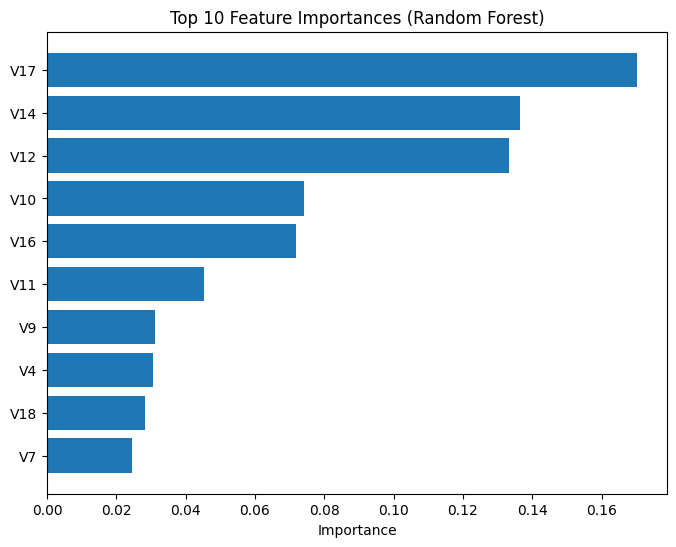

In [21]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[-10:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), feature_importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

## Feature Importance Analysis

The Random Forest model identifies the most influential features
contributing to fraud detection.

Although the dataset features are anonymised (PCA components),
this analysis demonstrates how tree-based models can rank
feature influence in classification tasks.

## Final Conclusion

This project demonstrates the challenges of fraud detection in highly
imbalanced datasets.

Key findings:

- Accuracy alone is misleading in imbalanced classification.
- Improving recall often reduces precision.
- Threshold tuning allows control of business trade-offs.
- Ensemble models such as Random Forest provide superior
  performance compared to linear models.

Future improvements could include:
- Hyperparameter tuning
- Gradient boosting models (XGBoost, LightGBM)
- Cost-sensitive learning
- Real-time deployment simulation